In [1]:
## importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading the dataset
data = pd.read_csv("Salary_Data.csv")
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


### EDA(Exploratary data analysis)

In [4]:
## checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# number of rows and columns
data.shape

(30, 2)

* There are 30 rows and 2 columns.

In [6]:
# checking the null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

* There is no null values in the Dataset

In [11]:
## checking the duplicates values
data[data.duplicated()].shape

(0, 2)

In [12]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking of Outliers in dataset

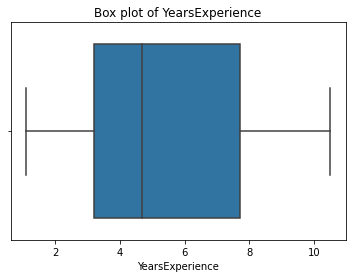

In [13]:
sns.boxplot(x=data['YearsExperience'])
plt.title("Box plot of YearsExperience")
plt.show()

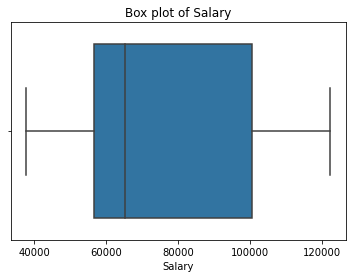

In [14]:
sns.boxplot(x=data['Salary'])
plt.title("Box plot of Salary")
plt.show()

* There is no outliers in the data

In [16]:
## correlation in datset
corr = data.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


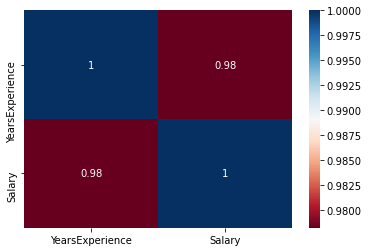

In [17]:
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

* There is good correlation between the two variables. The score is 0.98 which shows the strong positive correlation.

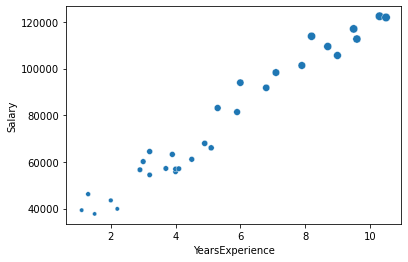

In [20]:
sns.scatterplot(x='YearsExperience',y='Salary',data=data,marker='o',size='Salary',legend=None)
plt.show()

* It shows the Salary increases the YearExperience increases, variation is constant along the way in data


### Feature Engineering and Machine Learning model

Trying different transformation of data to estimate normal distribution and remove any skewness

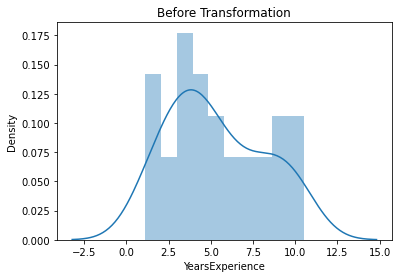

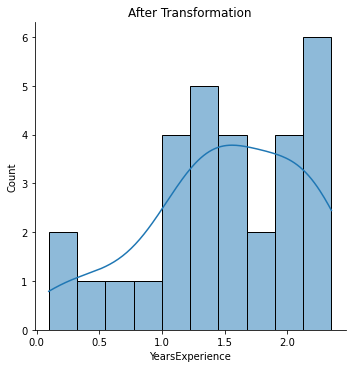

In [22]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

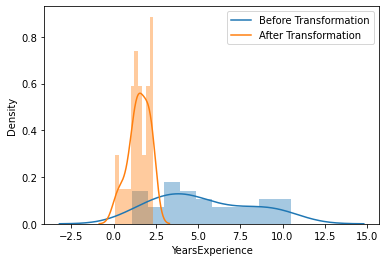

In [24]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

* We can see that how log transformation affects the data and it scales the value down.
* Before prediction it is necessary to revesre scaled the values,even for calculating RMSE for the  models.(Errors)

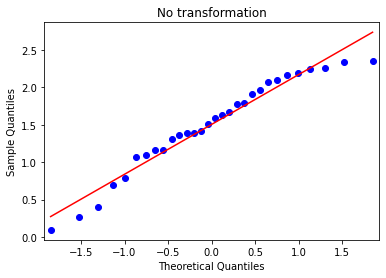

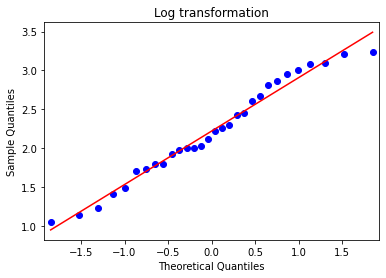

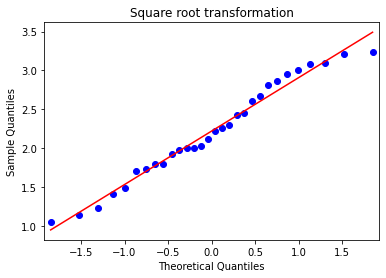

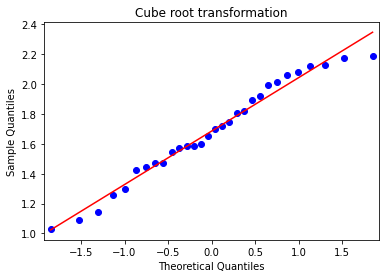

In [26]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

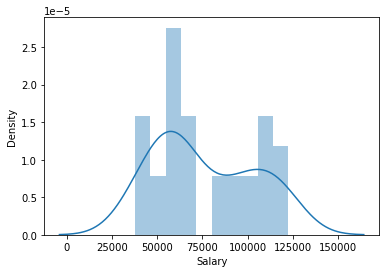

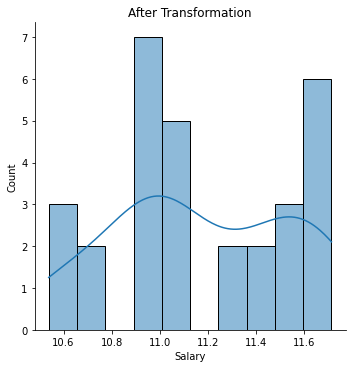

In [27]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

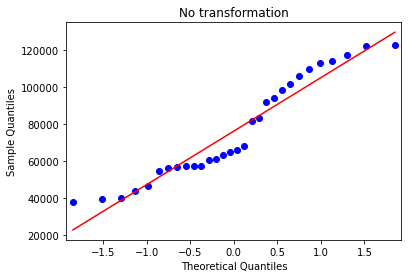

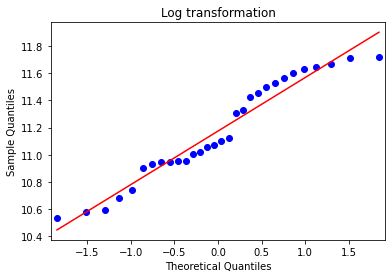

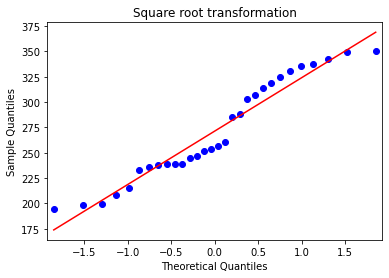

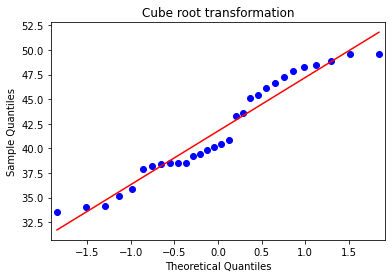

In [28]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

* We only perform any data trsansformation when the data is skewed or not normal distribution.N(0,1)

In [29]:
## fitting the linear regression model
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        16:51:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-squared and Adjusted R-squared scores are above 0.85.
* (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
* F-statitics is quite high as well and yes desire it to be higher
* But log-likelihood is quite very low far away from 0 and AIC and BIC score are much higher for this model
* Lets Try some data transformation to check whether these scores can get any better than this.

### Square Root Transformation on data

In [31]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        16:53:30   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
* (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
* F-statitics has gotten a little lower for this model than previous.
* But log-likelihood got better than before close to 0 higher than previous model and AIC and BIC score are now much better for this model
* Lets Try some data transformation to check whether these scores can get any better than this.

### Cuberoot transformation on data

In [33]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        16:55:06   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log Transformation on data

In [34]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        16:55:44   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model testing

In [35]:
## Finding Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [37]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

* Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

### Residual Analysis

#### Test for Normality of Residuals (Q-Q Plot)

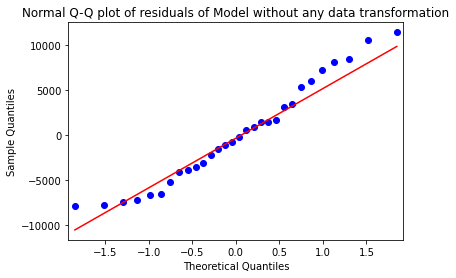

In [38]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

* The first model follows normal distribution

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

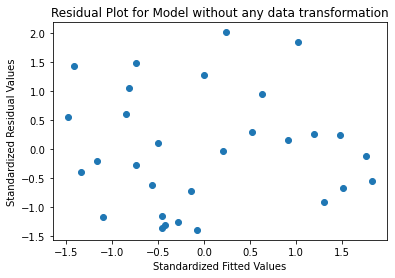

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

* The Model have Homoscedasciticity.
* The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
* Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

## Model Validation

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
model1_pred_y =np.square(model1.predict(data['YearsExperience']))
model2_pred_y =pow(model2.predict(data['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data['YearsExperience']))

In [61]:
model1_rmse =np.sqrt(mean_squared_error(data['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse)


model= 5788.315051119395 
model1= 5960.647096174311 
model2= 6232.81545583586


In [45]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

* Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

## Predicting values

In [60]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = data.YearsExperience
predicted2['Salary'] = data.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(data['YearsExperience']))
predicted2


,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
